<a href="https://colab.research.google.com/github/yoyoyo-yo/Gasyori100knock/blob/master/Question_21_30/Question_21_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 21 - 30

- Q.21 ヒストグラム正規化, Histogram normalization
- Q.22 ヒストグラムのスケーリングとシフト, Histogram scaling and shift
- Q.23. ヒストグラム平坦化, Histogram equalization
- Q.24. ガンマ補正, Gamma correction
- Q.25. 最近傍補間, Nearest nighbor interpolation (NN法)
- Q.26. バイリニア補間, Bi-linear interpolation
- Q.27. Bi-cubic補間
- Q.28. アフィン変換(平行移動), Affine shift
- Q.29. アフィン変換(拡大縮小), Affine scale
- Q.30. アフィン変換(回転), Affine rotation

In [1]:
!pip install numpy matplotlib opencv-python sklearn

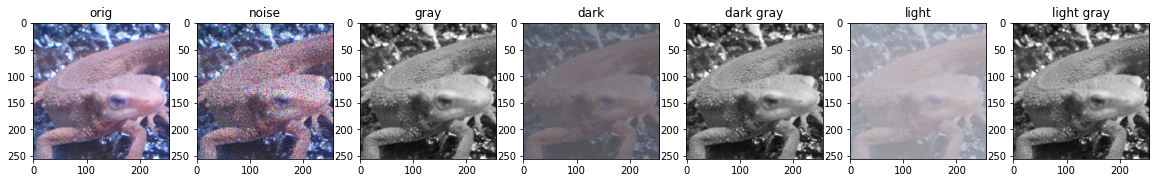

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)
img_dark = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256_dark.png')
img_dark_gray = cv2.cvtColor(img_dark, cv2.COLOR_RGB2GRAY)
img_light = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256_light.png')
img_light_gray = cv2.cvtColor(img_light, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(20, 4))
plt.subplot(1, 7, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 7, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 7, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.subplot(1, 7, 4); plt.imshow(img_dark);  plt.title('dark')
plt.subplot(1, 7, 5); plt.imshow(img_dark_gray, cmap='gray'); plt.title('dark gray')
plt.subplot(1, 7, 6); plt.imshow(img_light);  plt.title('light')
plt.subplot(1, 7, 7); plt.imshow(img_light_gray, cmap='gray'); plt.title('light gray')
plt.show()

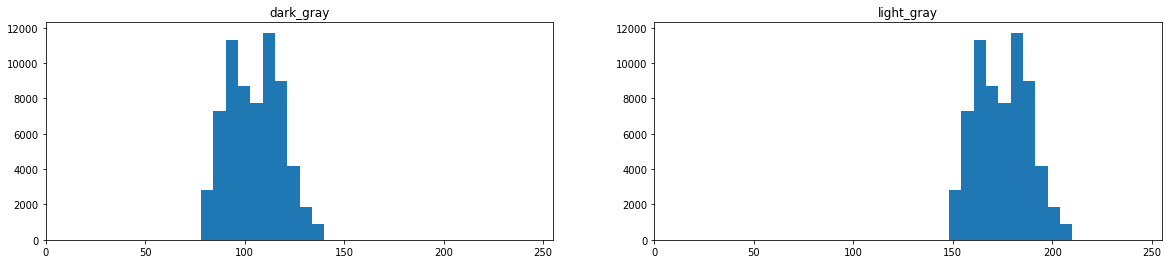

In [3]:
# 以外に面白いのが、暗い画像も明るい画像もグレースケールにすると結構近い色になること
# ヒストグラムはたしかに偏っている　
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark_gray.ravel()); plt.xlim(0, 255); plt.title('dark_gray')
plt.subplot(1, 2, 2); plt.hist(img_light_gray.ravel()); plt.xlim(0, 255); plt.title('light_gray')
plt.show()

## Q.21 ヒストグラム正規化, Histogram normalization


ヒストグラムは偏ることがある。
例えば、0に近い画素が多ければ画像は全体的に暗く、255に近い画素が多ければ画像は明るくなる。
ヒストグラムが局所的に偏っていることを**ダイナミックレンジが狭い**などと表現する。
そのため画像を人の目に見やすくするために、ヒストグラムを正規化したり平坦化したりなどの処理が必要である。

このヒストグラム正規化は**濃度階調変換(gray-scale transformation)** と呼ばれ、[c,d]の画素値を持つ画像を[a,b]のレンジに変換する場合は次式で実現できる。

$
x_{out} = \begin{cases}
a & if \,\, x_{in} < c \\
\frac{b-a}{d-c} (x_{in} - c) + a & else \, if \, c \leq x_{in} < d \\
b & else
\end{cases}
$

今回は*imori_256x256_dark.png*を[0, 255]のレンジにそれぞれ変換する。

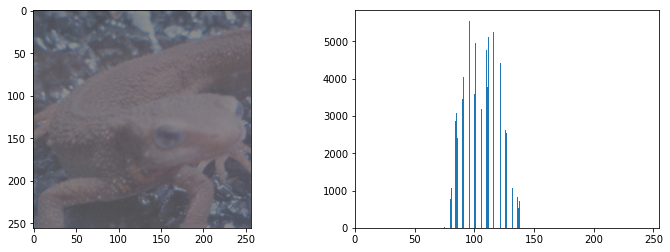

In [4]:
# 元々のヒストグラムはこれ　　明らかに画像は暗く、ヒストグラムも偏っている
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img_dark);
plt.subplot(1, 2, 2); plt.hist(img_dark.ravel(), bins=255);
plt.xlim([0, 255]); plt.show()

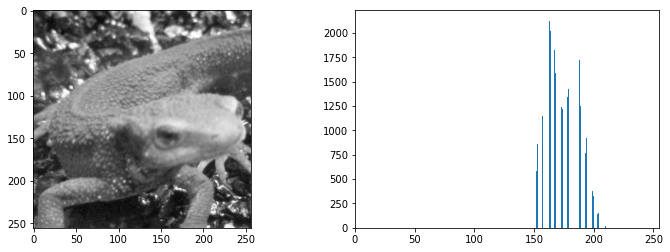

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.imshow(img_light_gray, cmap='gray');
plt.subplot(1, 2, 2); plt.hist(img_light_gray.ravel(), bins=255);
plt.xlim([0, 255]); plt.show()

In [6]:
# 実際に画素の最小最大を調べると、この範囲にしかピクセル値がない
img_dark.min(), img_dark.max()

(71, 140)

In [7]:
# answer
def hist_normalize(img, a, b):
    c, d = img.min(), img.max()
    # if c <= xin < d
    out = (b - a) / (d - c) * (img - c) + a
    # if xin < c
    out[img < c] = a
    # if xin > d
    out[img > d] = b
    return np.clip(out, 0, 255).astype(np.uint8)    


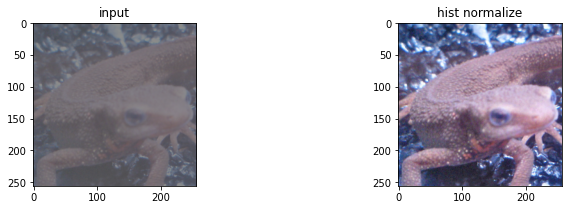

In [8]:
img_dark_hist_norm = hist_normalize(img_dark, a=0, b=255) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_dark_hist_norm)
plt.show()

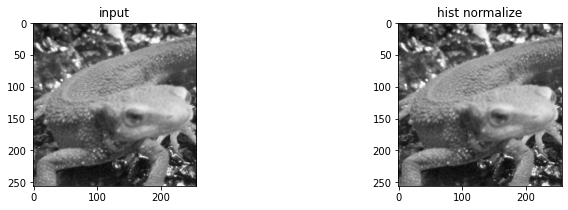

In [9]:
img_light_gray_hist_norm = hist_normalize(img_light_gray, a=0, b=255) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_light_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('hist normalize'); plt.imshow(img_light_gray_hist_norm, cmap='gray')
plt.show()

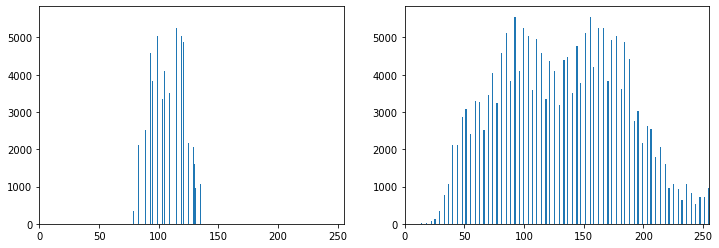

In [10]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_norm.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

## Q.22 ヒストグラムのスケーリングとシフト, Histogram scaling and shift

ヒストグラムの平均値をm0=128、標準偏差をs0=50になるように操作せよ。

これはヒストグラムのダイナミックレンジを変更するのではなく、ヒストグラムを平坦に変更する操作である。

もともとが平均値 $m_0$ 、標準偏差 $s_0$ 、のヒストグラムを平均値m, 標準偏差sに変更するには、次式によって変換する。

$x_{out} = \frac{s}{s_0}(x_{in} - m_0) + m$

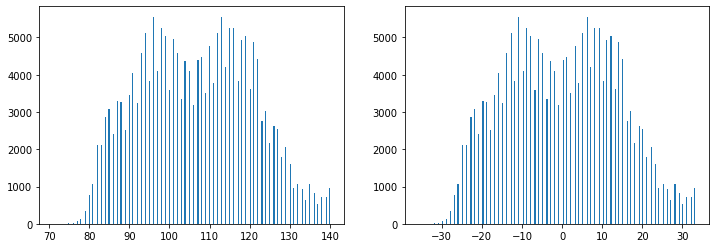

In [11]:
# 原理 1
# xin - m0 は画素の平均を0にする操作
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist((img_dark - img_dark.mean()).ravel(), bins=255)
plt.show()

In [12]:
img_dark.std()

14.010876302431814

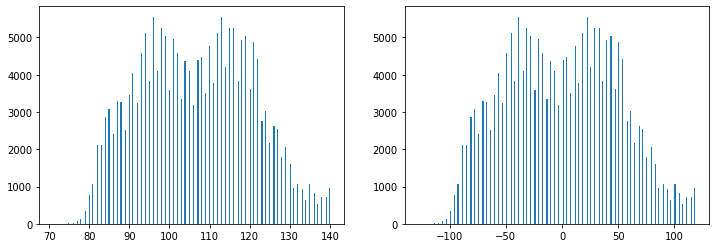

In [13]:
# 原理 2
# s / s0 は画素のstdを1にした後、希望の値にスケーリングする操作
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist( 50 / img_dark.std() * (img_dark - img_dark.mean()).ravel(), bins=255)
plt.show()

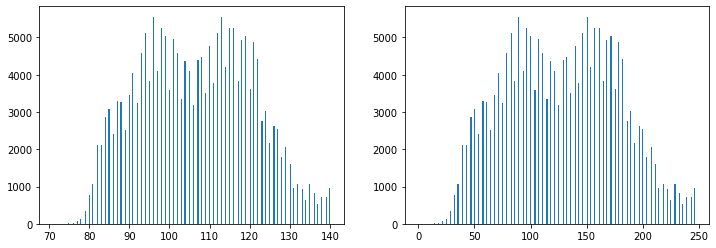

In [14]:
# 原理 3
# + m は希望のmeanにシフトする操作
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255)
plt.subplot(1, 2, 2); plt.hist( 50 / img_dark.std() * (img_dark - img_dark.mean()).ravel() + 128, bins=255)
plt.show()

In [15]:
# answer
def hist_scaleshift(img, m, s):
    m0, s0 = img.mean(), img.std()
    out = s / s0 * (img - m0) + m
    return np.clip(out, 0, 255).astype(np.uint8)

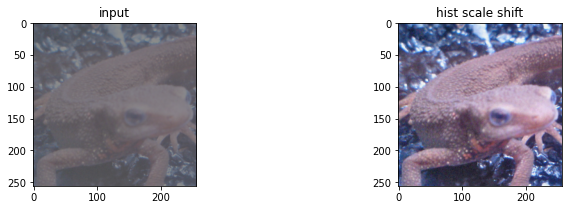

In [16]:
img_dark_hist_scaleshift = hist_scaleshift(img_dark, m=128, s=50) # smoothing filtering

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist scale shift'); plt.imshow(img_dark_hist_scaleshift)
plt.show()

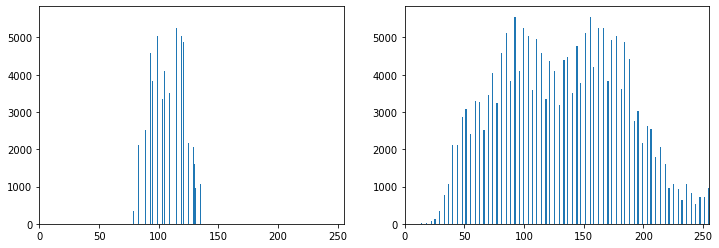

In [17]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_norm.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

## Q.23. ヒストグラム平坦化, Histogram equalization

ヒストグラム平坦化を実装せよ。

ヒストグラム平坦化とはヒストグラムを平坦に変更する操作であり、上記の平均値や標準偏差などを必要とせず、ヒストグラム値を均衡にする操作である。

画素がxのものは次式の変化でx'になる

S ... 画素の総数 (height x width x channel)、$x_{max}$ ... 画素値の最大値、h(i) ... 画素iの数

$x^{\prime} = \frac{x_{max}}{S} \sum_{i=0}^{x} h(i) $

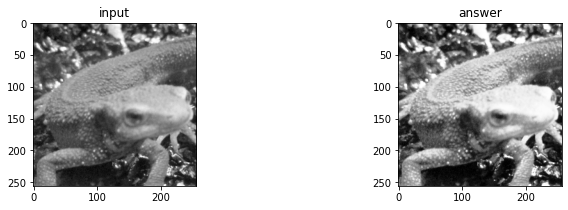

In [18]:
# opencv # opencvのは1チャンネルしか受け付けないらしい
img_dark_hist_equ = cv2.equalizeHist(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_dark_hist_equ, cmap='gray')
plt.show()

In [19]:
# answer
def hist_equ(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    x_max = 255
    h = 0

    for i in range(256):
        h += (img == i).sum()
        out[img == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)

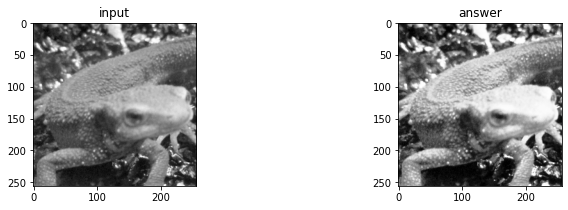

In [20]:
# グレースケール だと若干明るくなった？
img_dark_gray_hist_equ = hist_equ(img_dark_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_dark_gray_hist_equ, cmap='gray')
plt.show()

In [21]:
# RGB でやるなら、 RGBそれぞれでやるべきか？
def hist_equ_rgb(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.shape[0] * img.shape[1]
    x_max = 255

    for c in range(3):
        h = 0

        for i in range(256):
            h += (img[..., c] == i).sum()
            out[..., c][img[..., c] == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)

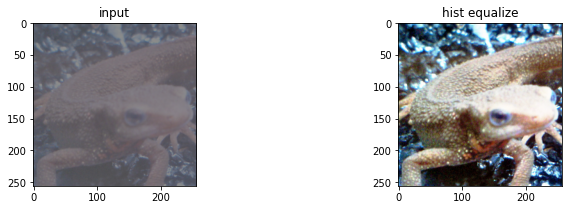

In [22]:
# RGBだと画像がめっちゃきれいになる
img_dark_hist_equ = hist_equ_rgb(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist equalize'); plt.imshow(img_dark_hist_equ)
plt.show()

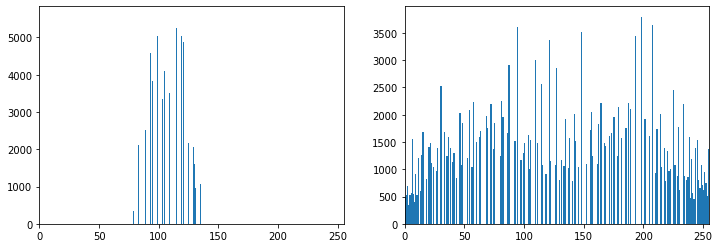

In [23]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

In [32]:
# RGB でやるなら、 RGBを一括でやるべきか？
def hist_equ_rgb_2(img):
    out = np.zeros_like(img, dtype=np.float32)

    s = img.size
    x_max = 255

    h = 0

    for i in range(256):
        h += (img == i).sum()
        out[img == i] = x_max / s * h

    return np.clip(out, 0, 255).astype(np.uint8)

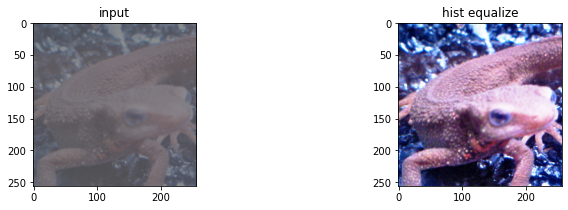

In [33]:
# RGBだと画像がめっちゃきれいになる
img_dark_hist_equ_2 = hist_equ_rgb_2(img_dark)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_dark)
plt.subplot(1, 2, 2); plt.title('hist equalize'); plt.imshow(img_dark_hist_equ_2)
plt.show()

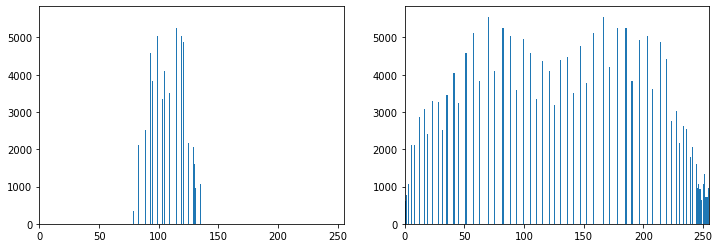

In [34]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.hist(img_dark.ravel(), bins=255); plt.xlim([0, 255])
plt.subplot(1, 2, 2); plt.hist(img_dark_hist_equ_2.ravel(), bins=255); plt.xlim([0, 255])
plt.show()

## Q.24. ガンマ補正, Gamma correction

*imori_256x256_gamma.jpg* に対してガンマ補正(c=1, g=2.2)を実行せよ。

ガンマ補正とは、カメラなどの媒体の経由によって画素値が非線形的に変換された場合の補正である。
ディスプレイなどで画像をそのまま表示すると画面が暗くなってしまうため、RGBの値を予め大きくすることで、ディスプレイの特性を排除した画像表示を行うことがガンマ補正の目的である。

非線形変換は次式で起こるとされる。
ただし **xは[0,1]** に正規化されている。
c ... 定数、g ... ガンマ特性(通常は2.2)

$x_{gamma} = c \, x_{in}^g$

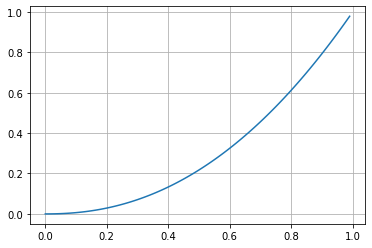

In [ ]:
x = np.arange(0, 1, 0.01); plt.plot(x, x ** 2.2); plt.grid(); plt.show()

これを線形に直すために次式の補正を掛ける

$x_{out} = (\frac{1}{c}x_{gamma})^{\frac{1}{g}}$

これは $0 \leq x \leq 1$ なので、 $0 \leq x \leq 255$ に逆正規化する必要がある

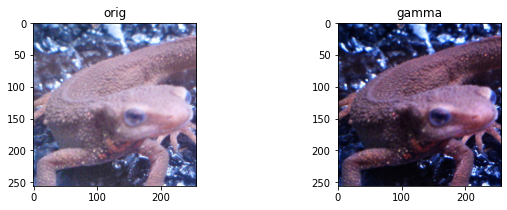

In [ ]:
# この位変わるらしい
img_gamma = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256_gamma.png')
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_gamma); plt.title('gamma')
plt.show()

In [ ]:
# answer 
def gamma_corr(img, c, g):
    out = (1 / c * (img / 255)) ** (1 / g)
    return np.clip(out * 255, 0, 255).astype(np.uint8)

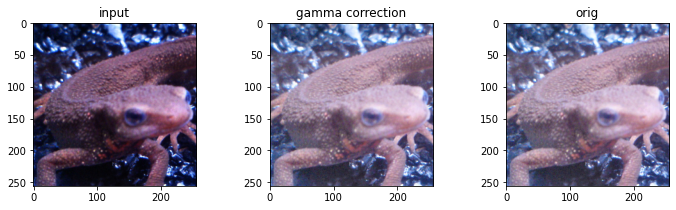

In [ ]:
# RGBだと画像がめっちゃきれいになる
img_gamma_corr = gamma_corr(img_gamma, c=1, g=2.2)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_gamma)
plt.subplot(1, 3, 2); plt.title('gamma correction'); plt.imshow(img_gamma_corr)
plt.subplot(1, 3, 3); plt.title('orig'); plt.imshow(img_orig)
plt.show()

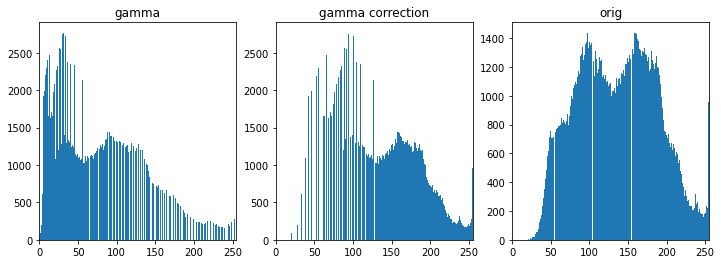

In [ ]:
# histogram をみると画素が分散した
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.hist(img_gamma.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma')
plt.subplot(1, 3, 2); plt.hist(img_gamma_corr.ravel(), bins=255); plt.xlim([0, 255]); plt.title('gamma correction')
plt.subplot(1, 3, 3); plt.hist(img_orig.ravel(), bins=255); plt.xlim([0, 255]); plt.title('orig')
plt.show()

## Q.25. 最近傍補間, Nearest nighbor interpolation (NN法)

最近傍補間により画像を1.5倍に拡大せよ。

最近傍補間(Nearest Neighbor)は画像の拡大時に最近傍にある画素をそのまま使う手法である。
シンプルで処理速度が速いが、画質の劣化は著しい。

画像が縦a倍、横b倍になったとすると、拡大後の画像のx, yはそれぞれ次式となる。拡大後x'の位置のピクセルは元画像のx/aの位置の画素値が当てはまることを意味する。

$y' = round(\frac{y}{a})$

$x' = round(\frac{x}{b})$


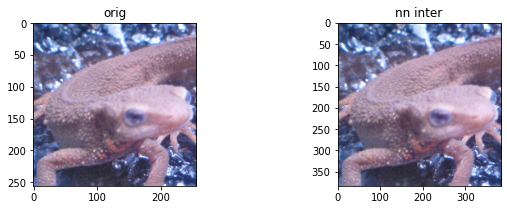

In [ ]:
# opencv
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)), 
                    interpolation=cv2.INTER_NEAREST)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()

In [ ]:
# answer
def nn_inter(img, a, b):
    out_h = int(img.shape[0] * a)
    out_w = int(img.shape[1] * b)
    out = np.zeros([out_h, out_w, img.shape[2]], dtype=np.uint8)

    xs, ys = np.meshgrid(range(out_h), range(out_w))
    out[ys, xs] = img[np.round(ys / a).astype(int), np.round(xs / b).astype(int)]
    return out

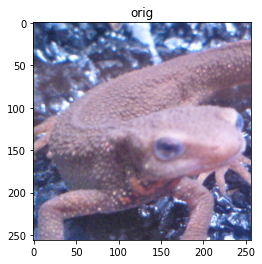

In [ ]:
plt.imshow(img_orig); plt.title('orig'); plt.show()

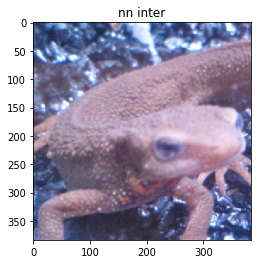

In [ ]:
img_nn = nn_inter(img_orig, a=1.5, b=1.5)
plt.imshow(img_nn); plt.title('nn inter'); plt.show()

## Q.26. バイリニア補間, Bi-linear interpolation

Bi-linear補間により画像を1.5倍に拡大せよ。

Bi-linear補間とは周辺の４画素に距離に応じた重みをつけることで補完する手法である。
計算量が多いだけ処理時間がかかるが、画質の劣化を抑えることができる。
縦にa倍、横にb倍にする場合で考える。

1. 拡大画像の座標(x', y')を拡大率で割り、x = floor(x'/b), y = floor(y'/a) を求める。
2. 元画像の(x'/b, y'/a)の周囲4画素、I(x,y), I(x+1,y), I(x,y+1), I(x+1, y+1)を求める

<img src="https://yoyoyo-yo.github.io/Gasyori100knock/Question_21_30/assets/bli_fig.png">

3. それぞれの画素と(x'/b, y'/a)との距離dを求め、重み付けする。
4. 次式によって拡大画像の画素(x',y')を求める。 

$dx = \frac{x'}{a} - x ,\,\, dy = \frac{y'}{a} - y$

$I^{\prime}(x^{\prime},y^{\prime}) = (1 - dx) (1 - dy) \, I(x, y) + dx \, (1 - dy) \, I(x+1, y) + (1-dx) \, dy \, I(x, y+1) + dx \, dy \, I(x+1, y+1)$


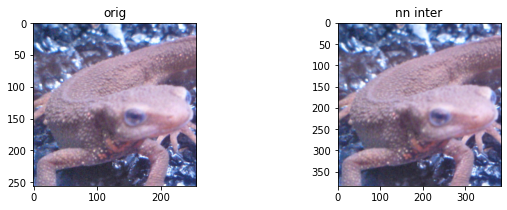

In [ ]:
# opencv
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)),
                    interpolation=cv2.INTER_LINEAR)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()

In [ ]:
# answer
def bilinear_inter(img, a, b):
    h, w, c = img.shape
    out_h = int(h * a)
    out_w = int(w * b)

    xs, ys = np.meshgrid(range(out_w), range(out_h)) # output image index

    _xs = np.floor(xs / b).astype(int) # original x
    _ys = np.floor(ys / a).astype(int) # original y

    dx = xs / b - _xs
    dy = ys / a - _ys

    dx = np.repeat(np.expand_dims(dx, axis=-1), c, axis=-1) # repeat channel
    dy = np.repeat(np.expand_dims(dy, axis=-1), c, axis=-1) # repeat channel

    _xs1p = np.minimum(_xs + 1, w - 1)
    _ys1p = np.minimum(_ys + 1, h - 1)


    out = (1 - dx) * (1 - dy) * img[_ys, _xs] + dx * (1 - dy) * img[_ys, _xs1p] + \
                    (1 - dx) * dy * img[_ys1p, _xs] + dx * dy * img[_ys1p, _xs1p]

    return np.clip(out, 0, 255).astype(np.uint8)

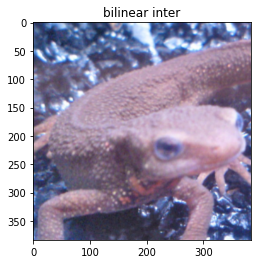

In [ ]:
img_bl = bilinear_inter(img_orig, a=1.5, b=1.5)
plt.imshow(img_bl); plt.title('bilinear inter'); plt.show()

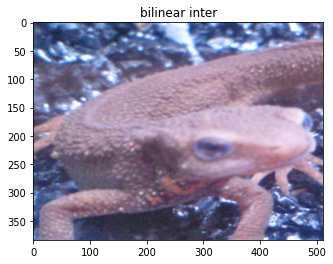

In [ ]:
img_bl = bilinear_inter(img_orig, a=1.5, b=2)
plt.imshow(img_bl); plt.title('bilinear inter'); plt.show()

## Q.27. Bi-cubic補間

Bi-cubic補間により画像を1.5倍に拡大せよ。

Bi-cubic補間とはBi-linear補間の拡張であり、周辺の16画素から補間を行う。
縦にa倍、横にb倍にする場合で考える。

<img src="https://yoyoyo-yo.github.io/Gasyori100knock/Question_21_30/assets/bci_fig.png">

$d_{x1} = \left| \frac{x^{\prime}}{b} - (x - 1) \right| ,  \,\,
d_{x2} = \left| \frac{x^{\prime}}{b} - x \right| ,  \,\,
d_{x3} = \left| \frac{x^{\prime}}{b} - (x + 1) \right| ,  \,\,
d_{x4} = \left| \frac{x^{\prime}}{b} - (x + 2) \right|
$

$
d_{y1} = \left| \frac{y^{\prime}}{a} - (y - 1) \right| ,  \,\,
d_{y2} = \left| \frac{y^{\prime}}{a} - y \right| ,  \,\,
d_{y3} = \left| \frac{y^{\prime}}{a} - (y + 1) \right| ,  \,\,
d_{y4} = \left| \frac{y^{\prime}}{a} - (y + 2) \right|
$

重みは距離によって次の関数により決定される。
a は多くの場合-1をとる。だいたい図の青色のピクセルは距離|t|<=1、緑色が1<|t|<=2の重みとなる。

$
h(t) = \begin{cases}
(a+2)|t|^3 - (a+3)|t|^2+1 & when \, |t| \leq 1 \\
a |t| ^ 3 - 5a | t | ^2 + 8a |t| - 4a & when \, 1 < |t| \leq 2 \\
0 & else
\end{cases}
$

これら画素と重みを用いて、次式で拡大画像の画素が計算される。
それぞれの画素と重みを掛けた和を重みの和で割る。

$
I^{\prime}(x^{\prime},y^{\prime}) = \frac{1}{ \sum_{j=1}^{4} \sum_{i=1}^{4} h(d_{xi}) h(d_{yj})} \sum_{j=1}^{4} \sum_{i=1}^{4} I(x + i - 2, y + j - 2) h(d_{xi}) h(d_{yi})
$


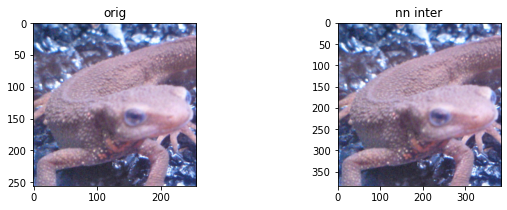

In [ ]:
# opencv
img_nn = cv2.resize(img_orig, (int(img_orig.shape[1] * 1.5), int(img_orig.shape[0] * 1.5)),
                    interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 2, 2); plt.imshow(img_nn); plt.title('nn inter')
plt.show()

In [ ]:
# answer
def bicubic_inter(img, a, b):
    h, w, c = img.shape
    out_h = int(h * a)
    out_w = int(w * b)
    out = np.zeros([out_h, out_w, c], dtype=np.float32)

    xs, ys = np.meshgrid(range(out_w), range(out_h)) # output image index

    _xs = np.floor(xs / b).astype(int) # original x
    _ys = np.floor(ys / a).astype(int) # original y

    dx1 = np.abs(xs / b - (_xs - 1))
    dx2 = np.abs(xs / b - _xs)
    dx3 = np.abs(xs / b - (_xs + 1))
    dx4 = np.abs(xs / b - (_xs + 2))
    dy1 = np.abs(ys / a - (_ys - 1))
    dy2 = np.abs(ys / a - _ys)
    dy3 = np.abs(ys / a - (_ys + 1))
    dy4 = np.abs(ys / a - (_ys + 2))

    dxs = [dx1, dx2, dx3, dx4]
    dys = [dy1, dy2, dy3, dy4]

    def weight(t, a=-1):
        w = np.zeros_like(t)
        w[t <= 1] = ((a + 2) * (t ** 3) - (a + 3) * (t ** 2) + 1)[t <= 1]
        w[t > 1] = (a * (t ** 3) - 5 * a * (t ** 2) + 8 * a * t - 4 * a)[t > 1]
        return w

    w_sum = np.zeros_like(out, dtype=np.float32)
    
    for j in range(-1, 3):
        for i in range(-1, 3):
            ind_x = np.minimum(np.maximum(_xs + i, 0), w - 1)
            ind_y = np.minimum(np.maximum(_ys + j, 0), h - 1)

            wx = weight(dxs[i + 1])
            wy = weight(dys[j + 1])
            wx = np.repeat(np.expand_dims(wx, axis=-1), 3, axis=-1)
            wy = np.repeat(np.expand_dims(wy, axis=-1), 3, axis=-1)

            w_sum += wx * wy
            out += wx * wy * img[ind_y, ind_x]

    return np.clip(out, 0, 255).astype(np.uint8)

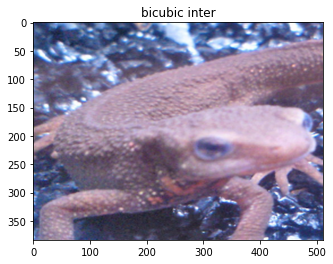

In [ ]:
img_bc = bicubic_inter(img_orig, a=1.5, b=2)
plt.imshow(img_bc); plt.title('bicubic inter'); plt.show()

In [ ]:
# meshgrid sample
np.meshgrid(range(5), range(10))

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9]])]

In [ ]:
# meshgrid sample
tmp = np.zeros([15, 15])
tmp[np.meshgrid(range(5), range(10))] = 1
tmp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

## Q.28. アフィン変換(平行移動), Affine shift

アフィン変換を利用して画像をx方向に+30、y方向に-30だけ平行移動させよ。

アフィン変換とは3x3の行列を用いて画像の変換を行う操作である。

変換は(1)平行移動(Q.28) (2)拡大縮小(Q.29) (3)回転(Q.30) (4)スキュー(Q.31) がある。

元画像の(x,y)の位置のピクセルが、アフィン変換後に(x',y')の位置になったとする。
画像の拡大縮小は、次式で表される。

$\begin{pmatrix}
x^{\prime} \\
y^{\prime} \\
\end{pmatrix}
=
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
$

一方、平行移動は次式。

$\begin{pmatrix}
x^{\prime} \\
y^{\prime} \\
\end{pmatrix}
=
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
+
\begin{pmatrix}
tx \\
ty \\
\end{pmatrix}$

拡大縮小と平行移動を合わせて次式で表せる

$\begin{pmatrix}
x^{\prime} \\
y^{\prime} \\
1 \\
\end{pmatrix}
=
\begin{pmatrix}
a & b & tx \\
c & d & ty \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix}$

今回の平行移動では次式を用いる。tx, tyが平行移動のピクセルの移動距離となる。

$\begin{pmatrix}
x^{\prime} \\
y^{\prime} \\
1 \\
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & tx \\
0 & 1 & ty \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix}$

**Affineの式をそのまま使ってもいいが、拡大や縮小時にはこの式では補間できないピクセルができてしまうので、実際にコードにする時はアフィン後の(x', y')位置のピクセルに対応する元画像のピクセル位置を逆算して出す必要がある。　つまり、次式**

$\begin{pmatrix}
x \\
y \\
\end{pmatrix}
=
\frac{1}{ad-bc}
\begin{pmatrix}
d & -b \\
-c & a \\
\end{pmatrix}
\begin{pmatrix}
x^{\prime} \\
y^{\prime} \\
\end{pmatrix}
-
\begin{pmatrix}
tx \\
ty \\
\end{pmatrix}$

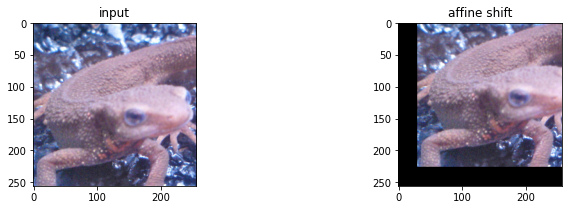

In [ ]:
# opencv
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, np.array([[1, 0, 30], [0, 1, -30]], dtype=np.float32), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

In [ ]:
# answer
def affine(img, affine_mat, out_shape):
    h, w, channel = img.shape

    [a, b, tx], [c, d, ty] = affine_mat
    out_h, out_w = out_shape

    out = np.zeros([out_h, out_w, channel])

    # pad for black
    img_pad = np.pad(img, [(1, 1), (1, 1), (0, 0)])
    
    xs, ys = np.meshgrid(range(out_w), range(out_h)) # output image index

    _xs = np.maximum(np.minimum((1 / (a * d - b * c) * (d * xs - b * ys) - tx).astype(int) + 1, w + 1), 0) # original image index x
    _ys = np.maximum(np.minimum((1 / (a * d - b * c) * (- c * xs + a * ys) - ty).astype(int) + 1, h + 1), 0) # original image index y

    out[ys, xs] = img_pad[_ys, _xs]
    return np.clip(out, 0, 255).astype(np.uint8)

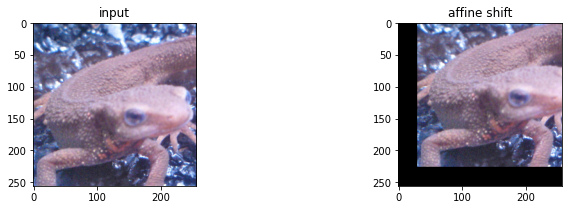

In [ ]:
h, w, c = img_orig.shape
img_affine_shift = affine(img_orig, [[1, 0, 30], [0, 1, -30]], (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

## Q.29. アフィン変換(拡大縮小), Affine scale

アフィン変換を用いて、(1)x方向に1.3倍、y方向に0.8倍にリサイズせよ。

また、(2)  (1)の条件に加えて、x方向に+30、y方向に-30だけ平行移動を同時に実現せよ。

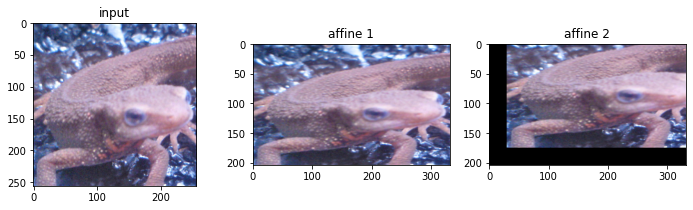

In [ ]:
# opencv
h, w, c = img_orig.shape
img_affine_2_1 = cv2.warpAffine(img_orig, np.array([[1.3, 0, 0], [0, 0.8, 0]], dtype=np.float32), (int(w * 1.3), int(h * 0.8)))
img_affine_2_2 = cv2.warpAffine(img_orig, np.array([[1.3, 0, 30], [0, 0.8, -30]], dtype=np.float32), (int(w * 1.3), int(h * 0.8)))

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 3, 2); plt.title('affine 1'); plt.imshow(img_affine_2_1)
plt.subplot(1, 3, 3); plt.title('affine 2'); plt.imshow(img_affine_2_2)
plt.show()

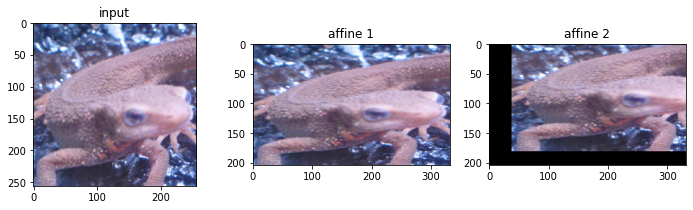

In [ ]:
# answer
h, w, c = img_orig.shape
img_affine_2_1 = affine(img_orig, [[1.3, 0, 0], [0, 0.8, 0]], (int(h * 0.8), int(w * 1.3)))
img_affine_2_2 = affine(img_orig, [[1.3, 0, 30], [0, 0.8, -30]], (int(h * 0.8), int(w * 1.3)))

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 3, 2); plt.title('affine 1'); plt.imshow(img_affine_2_1)
plt.subplot(1, 3, 3); plt.title('affine 2'); plt.imshow(img_affine_2_2)
plt.show()

## Q.30. アフィン変換(回転), Affine rotation

(1)アフィン変換を用いて、反時計方向に30度回転させよ。

(2) アフィン変換を用いて、反時計方向に30度回転した画像で中心座標を固定することで、なるべく黒い領域がなくなるように画像を作成せよ。
（ただし、単純なアフィン変換を行うと画像が切れてしまうので、工夫を要する。）

アフィン変換において、反時計方向にA度回転させる時は、次式となる。

$\begin{pmatrix}
x^{\prime} \\
y^{\prime} \\
1 \\
\end{pmatrix}
=
\begin{pmatrix}
cos(A) & -sin(A) & tx \\
sin(A) & cos(A) & ty \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix}$

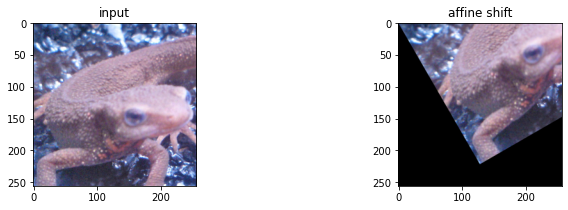

In [ ]:
# opencv
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, cv2.getRotationMatrix2D((0,0), 30, 1.0), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

In [ ]:
cv2.getRotationMatrix2D((0,0), -30, 1.0) # get affine rotation matrix, CCW is positive

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ]])

In [ ]:
cv2.getRotationMatrix2D((w/2.0, h/2.0), -30, 1.0) # get affine rotation matrix with center shift, CCW is positive

array([[  0.8660254 ,  -0.5       ,  81.14874832],
       [  0.5       ,   0.8660254 , -46.85125168]])

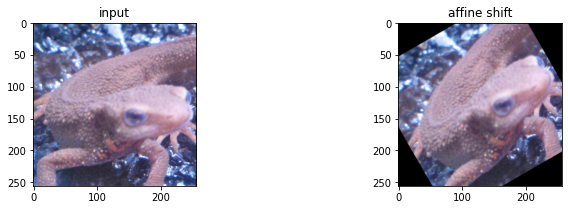

In [ ]:
# opencv considering shift
h, w, c = img_orig.shape
img_affine_shift = cv2.warpAffine(img_orig, cv2.getRotationMatrix2D((w / 2, h / 2), 30, 1.0), (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

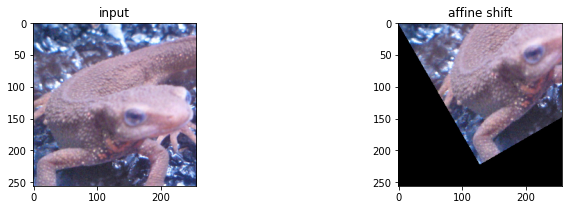

In [ ]:
# answer
rad = - 30 / 180 * np.pi
h, w, c = img_orig.shape
img_affine_shift = affine(img_orig, [[np.cos(rad), - np.sin(rad), 0], [np.sin(rad), np.cos(rad), -0]], (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()

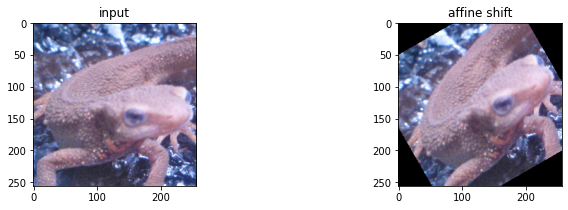

In [ ]:
# answer considering shift
rad = - 30 / 180 * np.pi
h, w, c = img_orig.shape
tx = int((np.cos(- rad) - 1) * w // 2 - np.sin(- rad) * h // 2)
ty = int(np.sin(- rad) * w // 2 + (np.cos(- rad) - 1) * h // 2)

img_affine_shift = affine(img_orig, [[np.cos(rad), - np.sin(rad), tx], [np.sin(rad), np.cos(rad), ty]], (h, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_orig)
plt.subplot(1, 2, 2); plt.title('affine shift'); plt.imshow(img_affine_shift)
plt.show()